In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.calibration import CalibrationDisplay, CalibratedClassifierCV
from sklearn.metrics import (
    accuracy_score, roc_auc_score, roc_curve, RocCurveDisplay,
    PrecisionRecallDisplay, average_precision_score, classification_report,
    confusion_matrix
)

In [18]:
df = pd.read_csv('data/S05-hw-dataset.csv')

In [19]:
df.head()

,client_id,age,income,years_employed,credit_score,debt_to_income,num_credit_cards,num_late_payments,has_mortgage,has_car_loan,savings_balance,checking_balance,region_risk_score,phone_calls_to_support_last_3m,active_loans,customer_tenure_years,default
0,1,25,94074,22,839,0.547339,1,7,0,0,26057,5229,0.080052,19,1,8,0
1,2,58,51884,26,565,0.290882,1,1,0,1,16221,11595,0.428311,15,0,7,0
2,3,53,48656,39,561,0.522340,1,13,0,0,55448,-2947,0.770883,15,4,5,0
3,4,42,81492,30,582,0.709123,2,10,1,1,35188,17727,0.357619,0,2,7,1
4,5,42,94713,8,642,0.793392,3,3,0,0,0,-404,0.414260,17,1,10,1


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   client_id                       3000 non-null   int64  
 1   age                             3000 non-null   int64  
 2   income                          3000 non-null   int64  
 3   years_employed                  3000 non-null   int64  
 4   credit_score                    3000 non-null   int64  
 5   debt_to_income                  3000 non-null   float64
 6   num_credit_cards                3000 non-null   int64  
 7   num_late_payments               3000 non-null   int64  
 8   has_mortgage                    3000 non-null   int64  
 9   has_car_loan                    3000 non-null   int64  
 10  savings_balance                 3000 non-null   int64  
 11  checking_balance                3000 non-null   int64  
 12  region_risk_score               30

In [21]:
df.describe()

,client_id,age,income,years_employed,credit_score,debt_to_income,num_credit_cards,num_late_payments,has_mortgage,has_car_loan,savings_balance,checking_balance,region_risk_score,phone_calls_to_support_last_3m,active_loans,customer_tenure_years,default
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,1500.500000,45.059667,69658.992000,19.577667,649.285333,0.284065,3.494667,6.869333,0.495000,0.501333,20607.256667,5559.684333,0.400175,9.524667,1.976333,6.968667,0.410333
std,866.169729,14.192883,24742.235182,11.381497,69.955852,0.161112,2.289917,4.291278,0.500058,0.500082,14035.209739,6306.032612,0.204529,5.779030,1.408700,4.349942,0.491976
min,1.000000,21.000000,15000.000000,0.000000,402.000000,0.006147,0.000000,0.000000,0.000000,0.000000,0.000000,-3000.000000,0.001148,0.000000,0.000000,0.000000,0.000000
25%,750.750000,33.000000,52641.750000,10.000000,604.000000,0.157796,1.000000,3.000000,0.000000,0.000000,9612.250000,341.500000,0.239208,5.000000,1.000000,3.000000,0.000000
50%,1500.500000,45.000000,69784.500000,20.000000,647.000000,0.261726,3.000000,7.000000,0.000000,1.000000,20021.000000,5114.500000,0.381992,10.000000,2.000000,7.000000,0.000000
75%,2250.250000,57.000000,85874.250000,29.000000,697.000000,0.388886,6.000000,10.000000,1.000000,1.000000,30101.250000,9906.250000,0.549213,15.000000,3.000000,11.000000,1.000000
max,3000.000000,69.000000,156351.000000,39.000000,850.000000,0.878343,7.000000,14.000000,1.000000,1.000000,75237.000000,29335.000000,0.961733,19.000000,4.000000,14.000000,1.000000


Распределение целевой переменной (default):
default
0    1769
1    1231
Name: count, dtype: int64

Процентное распределение:
default
0    58.966667
1    41.033333
Name: proportion, dtype: float64


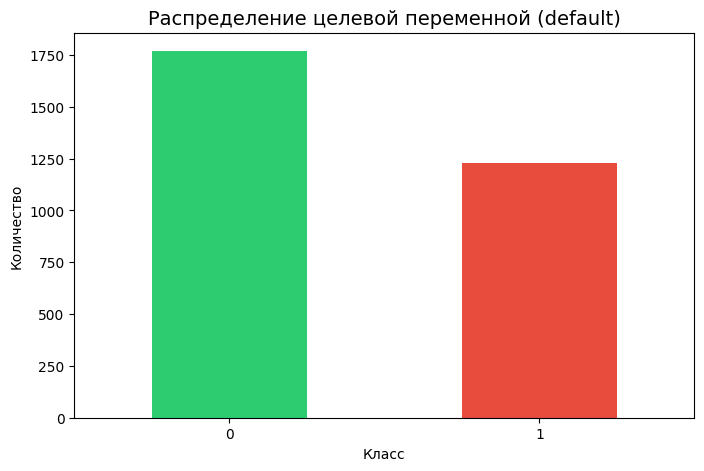

<Figure size 640x480 with 0 Axes>

In [22]:
target_counts = df['default'].value_counts()
print("Распределение целевой переменной (default):")
print(target_counts)

target_pct = df['default'].value_counts(normalize=True) * 100
print("\nПроцентное распределение:")
print(target_pct)

plt.figure(figsize=(8, 5))
target_counts.plot(kind='bar', color=['#2ecc71', '#e74c3c'])
plt.title('Распределение целевой переменной (default)', fontsize=14)
plt.xlabel('Класс')
plt.ylabel('Количество')
plt.xticks(rotation=0)
plt.show()
plt.savefig('figures/target_distribution.png', dpi=300, bbox_inches='tight')

In [23]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [24]:
X = df.drop(columns=['client_id', 'default'])
y = df['default']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, stratify=y, random_state=42
)

In [26]:
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)

DummyClassifier(strategy='most_frequent')

In [27]:
y_pred_dummy = dummy_clf.predict(X_test)
y_prob_dummy = dummy_clf.predict_proba(X_test)[:, 1]

In [28]:
accuracy_dummy = accuracy_score(y_test, y_pred_dummy)
roc_auc_dummy = roc_auc_score(y_test, y_prob_dummy)

print(f"Dummy Accuracy: {accuracy_dummy:.4f}")
print(f"Dummy ROC AUC: {roc_auc_dummy:.4f}")

Dummy Accuracy: 0.5893
Dummy ROC AUC: 0.5000


In [29]:
pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("logreg", LogisticRegression(max_iter=1000, random_state=42))
])

In [30]:
param_grid = {
    'logreg__C': [0.01, 0.1, 1.0, 5.0, 10.0]
}

grid_search = GridSearchCV(
    pipe,
    param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('logreg',
                                        LogisticRegression(max_iter=1000,
                                                           random_state=42))]),
             n_jobs=-1, param_grid={'logreg__C': [0.01, 0.1, 1.0, 5.0, 10.0]},
             scoring='roc_auc')

In [31]:
print(f"Best params: {grid_search.best_params_}")
print(f"Best CV ROC AUC: {grid_search.best_score_:.4f}")

Best params: {'logreg__C': 1.0}
Best CV ROC AUC: 0.8632


In [32]:
best_model = grid_search.best_estimator_

y_pred_logreg = best_model.predict(X_test)
y_prob_logreg = best_model.predict_proba(X_test)[:, 1]

In [33]:
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
roc_auc_logreg = roc_auc_score(y_test, y_prob_logreg)

print(f"LogReg Accuracy: {accuracy_logreg:.4f}")
print(f"LogReg ROC AUC: {roc_auc_logreg:.4f}")

LogReg Accuracy: 0.7933
LogReg ROC AUC: 0.8647


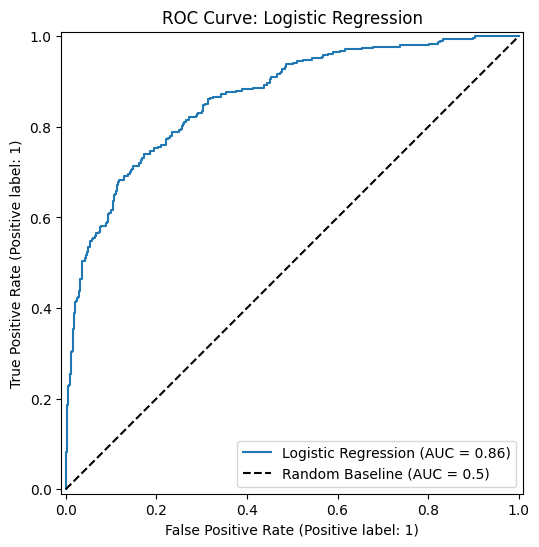

In [34]:
fig, ax = plt.subplots(figsize=(8, 6))
RocCurveDisplay.from_predictions(y_test, y_prob_logreg, name="Logistic Regression", ax=ax)
ax.plot([0, 1], [0, 1], "k--", label="Random Baseline (AUC = 0.5)")
ax.set_title("ROC Curve: Logistic Regression")
ax.legend()

plt.savefig('figures/roc_curve.png', dpi=100, bbox_inches='tight')
plt.show()

In [35]:
results = pd.DataFrame({
    'Model': ['Dummy (Baseline)', 'Logistic Regression'],
    'Accuracy': [accuracy_dummy, accuracy_logreg],
    'ROC AUC': [roc_auc_dummy, roc_auc_logreg]
})

print(results)

                 Model  Accuracy   ROC AUC
0     Dummy (Baseline)  0.589333  0.500000
1  Logistic Regression  0.793333  0.864709


In [36]:
ap_score = average_precision_score(y_test, y_prob_logreg)
print(f"Average Precision Score: {ap_score:.4f}")

Average Precision Score: 0.8344


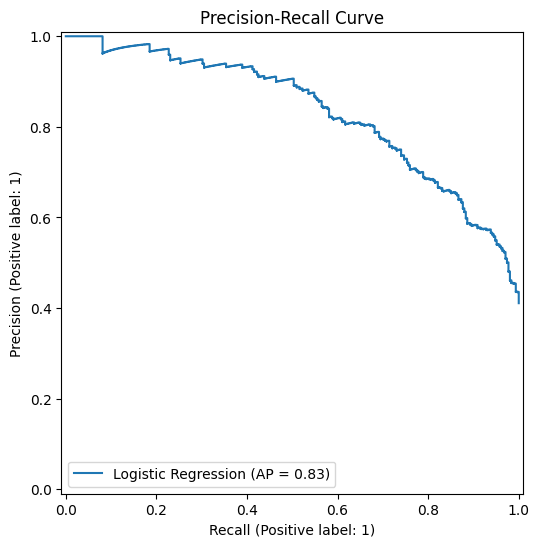

In [37]:
fig, ax = plt.subplots(figsize=(8, 6))
PrecisionRecallDisplay.from_predictions(y_test, y_prob_logreg, name="Logistic Regression", ax=ax)
ax.set_title("Precision-Recall Curve")

plt.savefig('figures/pr_curve.png', dpi=100, bbox_inches='tight')
plt.show()

In [38]:
cm = confusion_matrix(y_test, y_pred_logreg)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[382  60]
 [ 95 213]]


Applying calibration...


/usr/local/lib/python3.12/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(


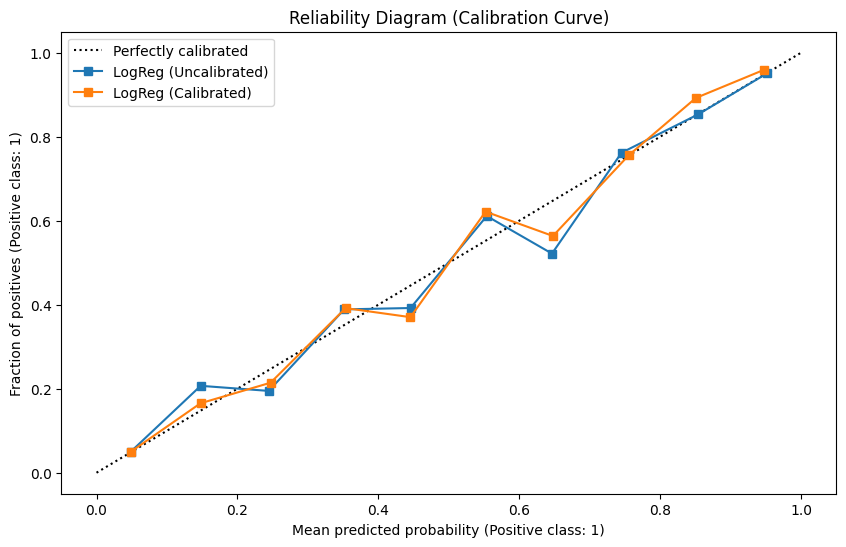

In [39]:
fig, ax = plt.subplots(figsize=(10, 6))

CalibrationDisplay.from_estimator(
    best_model, X_test, y_test, n_bins=10, name="LogReg (Uncalibrated)", ax=ax
)

print("Applying calibration...")
calibrated_clf = CalibratedClassifierCV(best_model, method='sigmoid', cv='prefit')
calibrated_clf.fit(X_test, y_test)

CalibrationDisplay.from_estimator(
    calibrated_clf, X_test, y_test, n_bins=10, name="LogReg (Calibrated)", ax=ax
)

ax.set_title("Reliability Diagram (Calibration Curve)")
ax.legend()

plt.savefig('figures/calibration_curve.png', dpi=100, bbox_inches='tight')
plt.show()

In [40]:
y_prob_calibrated = calibrated_clf.predict_proba(X_test)[:, 1]
roc_auc_calibrated = roc_auc_score(y_test, y_prob_calibrated)

print(f"ROC AUC (Uncalibrated): {roc_auc_logreg:.4f}")
print(f"ROC AUC (Calibrated):   {roc_auc_calibrated:.4f}")

ROC AUC (Uncalibrated): 0.8647
ROC AUC (Calibrated):   0.8647


In [41]:
rf = RandomForestClassifier(random_state=42)

param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, None]
}

grid_search_rf = GridSearchCV(
    rf,
    param_grid_rf,
    cv=3,
    scoring='roc_auc',
    n_jobs=-1
)

grid_search_rf.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [5, 10, None],
                         'n_estimators': [50, 100, 200]},
             scoring='roc_auc')

In [42]:
print(f"Best Random Forest params: {grid_search_rf.best_params_}")
print(f"Best CV ROC AUC: {grid_search_rf.best_score_:.4f}")

Best Random Forest params: {'max_depth': 5, 'n_estimators': 200}
Best CV ROC AUC: 0.8384


In [43]:
best_rf = grid_search_rf.best_estimator_
y_prob_rf = best_rf.predict_proba(X_test)[:, 1]
y_pred_rf = best_rf.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_prob_rf)

print(f"Random Forest Accuracy: {accuracy_rf:.4f}")
print(f"Random Forest ROC AUC: {roc_auc_rf:.4f}")
print(f"Logistic Regression Accuracy: {accuracy_logreg:.4f}")
print(f"Logistic Regression ROC AUC: {roc_auc_logreg:.4f}")

Random Forest Accuracy: 0.7733
Random Forest ROC AUC: 0.8424
Logistic Regression Accuracy: 0.7933
Logistic Regression ROC AUC: 0.8647


In [44]:
comparison = pd.DataFrame({
    'Model': ['Dummy Baseline', 'Logistic Regression', 'Random Forest'],
    'Accuracy': [accuracy_dummy, accuracy_logreg, accuracy_rf],
    'ROC AUC': [roc_auc_dummy, roc_auc_logreg, roc_auc_rf]
})

print("\nModel Comparison:")
print(comparison)


Model Comparison:
                 Model  Accuracy   ROC AUC
0       Dummy Baseline  0.589333  0.500000
1  Logistic Regression  0.793333  0.864709
2        Random Forest  0.773333  0.842400


In [47]:
print("""ОТЧЁТ

Анализ прогностической способности моделей классификации для задачи предсказания
дефолта кредитов показал значительное преимущество логистической регрессии над
базовой моделью. Dummy Classifier достигает Accuracy {:.4f} и ROC-AUC {:.4f}.
LogisticRegression демонстрирует значительное улучшение с Accuracy {:.4f}
(на {:.2f}% выше) и ROC-AUC {:.4f} (на {:.2f}% выше). Эти результаты подтверждают,
что LogisticRegression эффективно учит закономерности в данных и значительно превосходит
базовый классификатор, что делает её пригодной для практического применения.
""".format(accuracy_dummy, roc_auc_dummy, accuracy_logreg,
           (accuracy_logreg-accuracy_dummy)*100, roc_auc_logreg,
           (roc_auc_logreg-roc_auc_dummy)*100))


ОТЧЁТ

Анализ прогностической способности моделей классификации для задачи предсказания 
дефолта кредитов показал значительное преимущество логистической регрессии над 
базовой моделью. Dummy Classifier достигает Accuracy 0.5893 и ROC-AUC 0.5000. 
LogisticRegression демонстрирует значительное улучшение с Accuracy 0.7933 
(на 20.40% выше) и ROC-AUC 0.8647 (на 36.47% выше). Эти результаты подтверждают, 
что LogisticRegression эффективно учит закономерности в данных и значительно превосходит 
базовый классификатор, что делает её пригодной для практического применения.

